# Natural Language Processing
---------------------------------------------------

This example shows how to use ATOM to quickly go from raw text data to model predictions.

Import the 20 newsgroups text dataset from [sklearn.datasets](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). The dataset comprises around 18000 articles on 20 topics. The goal is to predict the topic of every article.

## Load the data

In [1]:
import numpy as np
from atom import ATOMClassifier
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Use only a subset of the available topics for faster processing
X_text, y_text = fetch_20newsgroups(
    return_X_y=True,
    categories=[
        'alt.atheism',
        'sci.med',
        'comp.windows.x',
        'misc.forsale',
        'rec.autos',
    ],
    shuffle=True,
    random_state=1,
)
X_text = np.array(X_text).reshape(-1, 1)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X_text, y_text, test_size=0.3, verbose=2, warnings=False)

<< ================== ATOM ================== >>
Algorithm task: multiclass classification.

Dataset stats ==================== >>
Shape: (2846, 2)
Scaled: False
Categorical features: 1 (100.0%)
-------------------------------------
Train set size: 1993
Test set size: 853
-------------------------------------
|    |     dataset |       train |        test |
| -- | ----------- | ----------- | ----------- |
| 0  |   480 (1.0) |   334 (1.0) |   146 (1.0) |
| 1  |   593 (1.2) |   399 (1.2) |   194 (1.3) |
| 2  |   585 (1.2) |   417 (1.2) |   168 (1.2) |
| 3  |   594 (1.2) |   425 (1.3) |   169 (1.2) |
| 4  |   594 (1.2) |   418 (1.3) |   176 (1.2) |



In [4]:
atom.dataset  # Note that the feature is automatically named 'corpus'

,corpus,target
0,From: eliot@lanmola.engr.washington.edu (eliot...,3
1,From: jchen@wind.bellcore.com (Jason Chen)\nSu...,3
2,From: romdas@uclink.berkeley.edu (Ella I Baff)...,4
3,From: geb@cs.pitt.edu (Gordon Banks)\nSubject:...,4
4,From: steveg@bach.udel.edu (Steven N Gaudino)\...,2
...,...,...
2841,From: rjwade@rainbow.ecn.purdue.edu (Robert J....,3
2842,From: kmr4@po.CWRU.edu (Keith M. Ryan)\nSubjec...,0
2843,From: al@qiclab.scn.rain.com (Alan Peterman)\n...,2
2844,From: usun@mcl.ucsb.edu (Sonnie)\nSubject: X b...,1


In [5]:
# Let's have a look at the first document
atom.corpus[0]

"From: eliot@lanmola.engr.washington.edu (eliot)\nSubject: Re: Manual Shift Bigots\nOrganization: clearer than blir\nLines: 34\nNNTP-Posting-Host: lanmola.engr.washington.edu\n\nIn article <C5LIw2.CAx@news.rich.bnr.ca> Peon w/o Email (Eric Youngblood) writes:\n>In article <1qn2lo$c9s@vela.acs.oakland.edu>, mje@pookie.pass.wayne.edu (Michael J. Edelman) writes:\n>The big disadvantage of automatics is the ~10% HP they consume that never\n>gets to the wheels.  In this respect they are at a disadvantage to a manual.\n\nonly when the torque converter is not locked up.  there are autos out there\nwith converter lock up in 2nd, 3rd and 4th gears.\n\n>Dont forget that now that new 6 speed manual trannys are available the drive\n>train is more optimally geared to get the most out of the engine.\n\nrare.. so are 5 speed autos.. but very real.\n\n>Bottom line is both manuals and automatics have vastly improved.\n\ni think that automatics have advanced far more than manuals.\nespecially in shift i

In [6]:
# Clean the documents from noise (emails, numbers, etc...)
atom.textclean()

Filtering the corpus...
 --> Decoding unicode characters to ascii.
 --> Converting text to lower case.
 --> Dropping 10012 emails from 2830 documents.
 --> Dropping 0 URL links from 0 documents.
 --> Dropping 2214 HTML tags from 1304 documents.
 --> Dropping 2 emojis from 1 documents.
 --> Dropping 31222 numbers from 2843 documents.
 --> Dropping punctuation from the text.


In [7]:
# Have a look at the removed items
atom.drops

,email,url,html,emoji,number
0,"[eliot@lanmola.engr.washington.edu, c5liw2.cax...",NaN,"[<>, <1qn2lo$>]",NaN,"[34, 10, 6, 5]"
1,"[jchen@wind.bellcore.com, jchen@ctt.bellcore.com]",NaN,NaN,NaN,[10]
2,"[romdas@uclink.berkeley.edu, romdas@uclink.ber...",NaN,NaN,NaN,"[37, 1, 2, 90, 90, 3]"
3,"[geb@cs.pitt.edu, geb@cs.pitt.edu, 3fb51b6w165...",NaN,[<>],NaN,[12]
4,[steveg@bach.udel.edu],NaN,NaN,NaN,"[4, 1, 5, 3, 5, 2, 0, 175]"
...,...,...,...,...,...
2841,"[rjwade@rainbow.ecn.purdue.edu, holcomb.93apr1...",NaN,"[<>, <>]",NaN,"[93, 4, 16, 4, 4, 4, 175, 185, 4, 3, 140, 3, 3..."
2842,"[kmr4@po.cwru.edu, 1993apr6.041343.24997@cbnew...",NaN,[<>],NaN,"[1447, 734101641, 28, 4, 1993]"
2843,"[al@qiclab.scn.rain.com, al@qiclab.scn.rain.com]",NaN,NaN,NaN,"[023937, 8223, 62, 50, 1, 7, 30, 15, 50, 1, 4,..."
2844,[usun@mcl.ucsb.edu],NaN,NaN,NaN,[10]


In [8]:
# Check how the first document changed
atom.corpus[0]

'from  eliot\nsubject re manual shift bigots\norganization clearer than blir\nlines \nnntppostinghost lanmolaengrwashingtonedu\n\nin article  peon wo email eric youngblood writes\nin article   michael j edelman writes\nthe big disadvantage of automatics is the  hp they consume that never\ngets to the wheels  in this respect they are at a disadvantage to a manual\n\nonly when the torque converter is not locked up  there are autos out there\nwith converter lock up in 2nd 3rd and 4th gears\n\ndont forget that now that new  speed manual trannys are available the drive\ntrain is more optimally geared to get the most out of the engine\n\nrare so are  speed autos but very real\n\nbottom line is both manuals and automatics have vastly improved\n\ni think that automatics have advanced far more than manuals\nespecially in shift intelligence  i say that a smart automatic is\nbetter than the majority of drivers in terms of being in the right\ngear at the right time which to me is more important th

In [9]:
# Convert the strings to a sequence of words
atom.tokenize()

Tokenizing the corpus...


In [10]:
# Print the first few words of the first document
atom.corpus[0][:7]

['from', 'eliot', 'subject', 're', 'manual', 'shift', 'bigots']

In [11]:
# Normalize the text to a predefined standard
atom.normalize(stopwords="english", lemmatize=True)

Normalizing the corpus...
 --> Dropping stopwords.
 --> Applying lemmatization.


In [12]:
atom.corpus[0][:7]  # Check changes...

['eliot', 'subject', 'manual', 'shift', 'bigot', 'organization', 'clearer']

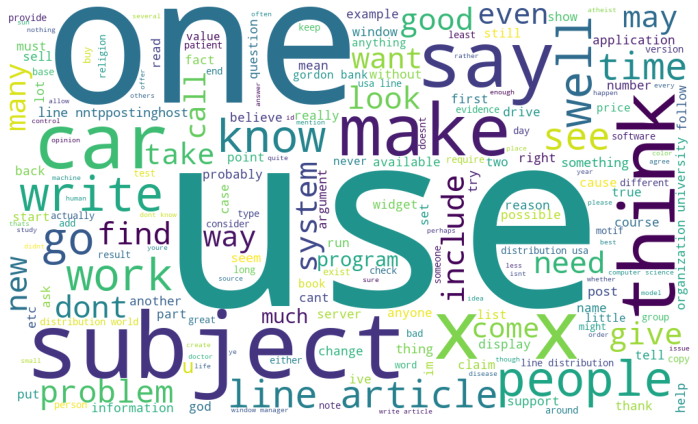

In [13]:
# Visualize the most common words with a wordcloud
atom.plot_wordcloud()

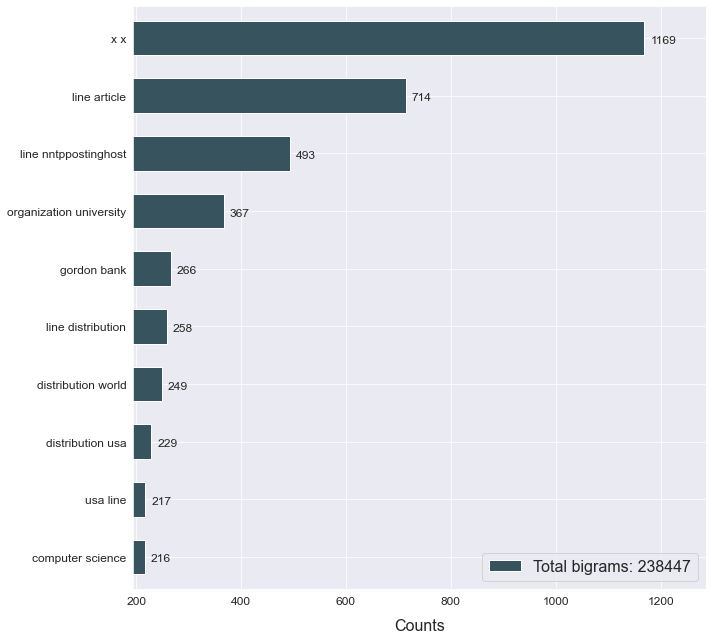

In [14]:
# Have a look at the most frequent bigrams
atom.plot_ngrams(2)

In [15]:
# Create the bigrams using the tokenizer
atom.tokenize(bigram_freq=215)

Tokenizing the corpus...
 --> Creating 10 bigrams on 4178 locations.


In [16]:
atom.bigrams

,bigram,frequency
9,"(x, x)",1169
6,"(line, article)",714
0,"(line, nntppostinghost)",493
1,"(organization, university)",367
4,"(gordon, bank)",266
2,"(line, distribution)",258
3,"(distribution, world)",249
7,"(distribution, usa)",229
8,"(usa, line)",217
5,"(computer, science)",216


In [17]:
# As a last step before modelling, convert the words to vectors
atom.vectorize(strategy="tf-idf")

Vectorizing the corpus...


In [18]:
# The dimensionality of the dataset has increased a lot!
atom.shape

(2846, 28971)

In [19]:
# Note that the data is now stored as sparse dataframe
atom.dtypes

00          Sparse[float64, 0]
000         Sparse[float64, 0]
0000am      Sparse[float64, 0]
000cc       Sparse[float64, 0]
000miles    Sparse[float64, 0]
                   ...        
zvonko      Sparse[float64, 0]
zx          Sparse[float64, 0]
zz          Sparse[float64, 0]
zzzs        Sparse[float64, 0]
target_y                 int64
Length: 28971, dtype: object

In [20]:
# Check which models have support for sparse matrices
atom.available_models()[["acronym", "fullname", "accepts_sparse"]]

,acronym,fullname,accepts_sparse
0,Dummy,Dummy Estimator,False
1,GP,Gaussian Process,False
2,GNB,Gaussian Naive Bayes,False
3,MNB,Multinomial Naive Bayes,True
4,BNB,Bernoulli Naive Bayes,True
5,CatNB,Categorical Naive Bayes,True
6,CNB,Complement Naive Bayes,True
7,Ridge,Ridge Estimator,True
8,LR,Logistic Regression,True
9,LDA,Linear Discriminant Analysis,False


In [21]:
# Train the model
atom.run(models="MLP", metric="f1_weighted")


Training ========================= >>
Models: MLP
Metric: f1_weighted


Results for Multi-layer Perceptron:
Fit ---------------------------------------------
Train evaluation --> f1_weighted: 1.0
Test evaluation --> f1_weighted: 0.972
Time elapsed: 2m:14s
-------------------------------------------------
Total time: 2m:14s


Final results ==================== >>
Duration: 2m:14s
-------------------------------------
Multi-layer Perceptron --> f1_weighted: 0.972


## Analyze results

In [22]:
atom.evaluate()

,balanced_accuracy,f1_weighted,jaccard_weighted,matthews_corrcoef,precision_weighted,recall_weighted
MLP,0.97236,0.971951,0.945894,0.96478,0.972123,0.971864


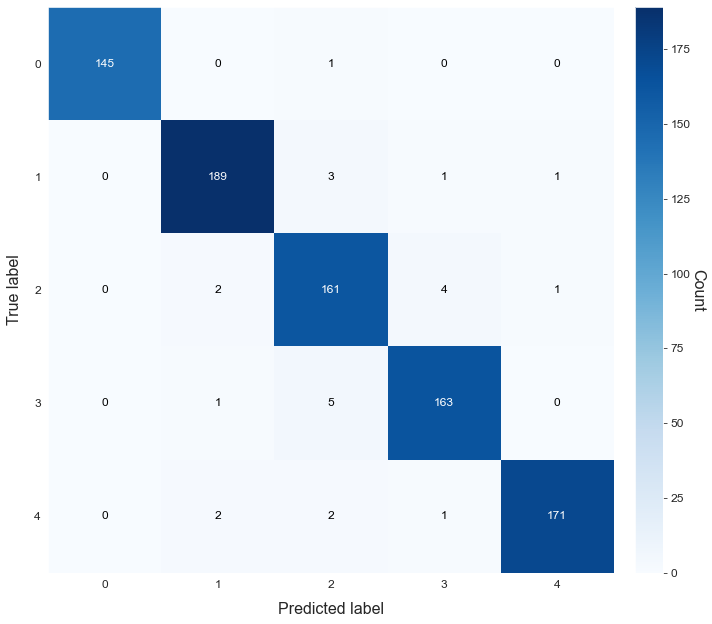

In [23]:
atom.plot_confusion_matrix(figsize=(10, 10))